# 40-modeling-sklearn
> Modeling using scikit-learn

In this notebook, we train models using the pipeline functionality from scikit-learn.

In [1]:
!pip3 install sklearn

Defaulting to user installation because normal site-packages is not writeable


In [3]:
#tables and visualizations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

#machine learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [4]:
import os


In [5]:
os.chdir('/data/p_dsi/teams2023/team9/')
os.getcwd()

'/gpfs52/data/p_dsi/teams2023/team9'

# Load the data

# Split the data

converting data types into integer and encoding all categorical variables;
Converting original dataset into model-based dataset

In [41]:
data_filename = 'final_input_data.csv'
df_apple = pd.read_csv(data_filename)
df_apple['week_of_monday'] = pd.to_datetime(df_apple[['year', 'month', 'day']])
df_apple = df_apple.set_index('week_of_monday')
df_apple.index = pd.to_datetime(df_apple.index)
display(df_apple.head())
df_apple.info()


,phone size,claim,year,black,blue,coral,gold,graphite,gray,green,...,Q4,iphone 11,iphone 12,iphone 13,iphone 14,iphone se,iphone x,weekofyear,month,day
week_of_monday,,,,,,,,,,,,,,,,,,,,,
2021-06-28,128,111,2021,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,26,6,28
2021-06-28,128,22,2021,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,26,6,28
2021-06-28,128,42,2021,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,26,6,28
2021-06-28,128,46,2021,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,26,6,28
2021-06-28,128,51,2021,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,26,6,28


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12064 entries, 2021-06-28 to 2023-02-27
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   phone size  12064 non-null  int64
 1   claim       12064 non-null  int64
 2   year        12064 non-null  int64
 3   black       12064 non-null  int64
 4   blue        12064 non-null  int64
 5   coral       12064 non-null  int64
 6   gold        12064 non-null  int64
 7   graphite    12064 non-null  int64
 8   gray        12064 non-null  int64
 9   green       12064 non-null  int64
 10  midnight    12064 non-null  int64
 11  pink        12064 non-null  int64
 12  purple      12064 non-null  int64
 13  red         12064 non-null  int64
 14  silver      12064 non-null  int64
 15  starlight   12064 non-null  int64
 16  white       12064 non-null  int64
 17  yellow      12064 non-null  int64
 18  autumn      12064 non-null  int64
 19  spring      12064 non-null  int64
 20  summer     

In [54]:
# data splitting
train = df_apple.iloc[:int(len(df_apple)*0.75)]
test = df_apple.iloc[int(len(df_apple)*0.75):]

FEATURES = df_apple.columns.to_list()
FEATURES.remove('claim')
TARGET = 'claim'

X_train = train[FEATURES]
Y_train = train[TARGET]

X_test = test[FEATURES]
Y_test = test[TARGET]



# Model Training


In [26]:
model = RandomForestRegressor(oob_score = True, n_jobs=1, random_state = 10, 
                              max_features = "auto", min_samples_leaf = 4)

In [27]:
model.fit(X_train, Y_train)

RandomForestRegressor(min_samples_leaf=4, n_jobs=1, oob_score=True,
                      random_state=10)

In [28]:
pred = model.predict(X_test)
display(pred)

array([ 1.04578571, 42.97881932, 30.55527712, ..., 62.98885076,
       59.27715267, 28.63994748])

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
r2_score(Y_test, pred)

0.3751734505297951

In [11]:
cross_val_score(model, X_train, Y_train, cv = 5)

array([0.56917703, 0.57022405, 0.6082542 , 0.67889884, 0.5196304 ])

In [31]:
print(f'model score on training data: {model.score(X_train, Y_train)}')
print(f'model score on testing data: {model.score(X_test, Y_test)}')

model score on training data: 0.6848130747953627
model score on testing data: 0.3751734505297951


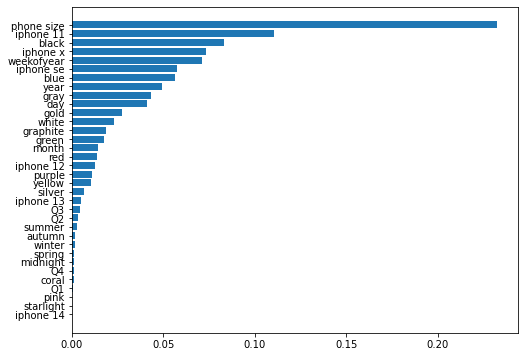

In [32]:
# feature importances
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(8,6))
fig.subplots_adjust(hspace=1)

ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

# Modeling based on important features

In [56]:
df_apple_2 = df_apple.copy()
df_apple_2 = df_apple_2[['phone size', 'claim','iphone 11','black','iphone x','blue','year','weekofyear',
                         'iphone se','day', 'gray','gold','white','iphone 12','month','iphone 14']]
display(df_apple_2)

,phone size,claim,iphone 11,black,iphone x,blue,year,weekofyear,iphone se,day,gray,gold,white,iphone 12,month,iphone 14
week_of_monday,,,,,,,,,,,,,,,,
2021-06-28,128,111,1,1,0,0,2021,26,0,28,0,0,0,0,6,0
2021-06-28,128,22,1,0,0,0,2021,26,0,28,0,0,0,0,6,0
2021-06-28,128,42,1,0,0,0,2021,26,0,28,0,0,0,0,6,0
2021-06-28,128,46,1,0,0,0,2021,26,0,28,0,0,0,0,6,0
2021-06-28,128,51,1,0,0,0,2021,26,0,28,0,0,1,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27,512,11,0,0,1,0,2023,9,0,27,1,0,0,0,2,0
2023-02-27,512,2,0,0,1,0,2023,9,0,27,0,0,0,0,2,0
2023-02-27,64,45,0,0,1,0,2023,9,0,27,0,1,0,0,2,0


In [65]:
# data splitting
train = df_apple_2.iloc[:int(len(df_apple_2)*0.75)]
test = df_apple_2.iloc[int(len(df_apple_2)*0.75):]

FEATURES = df_apple_2.columns.to_list()
FEATURES.remove('claim')
TARGET = 'claim'

X_train = train[FEATURES]
Y_train = train[TARGET]

X_test = test[FEATURES]
Y_test = test[TARGET]


In [58]:
model2 = RandomForestRegressor(oob_score = True, n_jobs=1, random_state = 10, 
                              max_features = "auto", min_samples_leaf = 4)

model2.fit(X_train, Y_train)

RandomForestRegressor(min_samples_leaf=4, n_jobs=1, oob_score=True,
                      random_state=10)

In [59]:
pred2 = model2.predict(X_test)
r2_score(Y_test, pred2)

0.3264333742800051

# Model 1 graphing

In [33]:
import seaborn as sns

In [34]:
try:
    with open("final_test_set.csv", 'r') as tempfile: # OSError if file exists or is invalid
        pass
except OSError as e:
    print(e)
    # handle error here

In [61]:
#load the data and learn a bit
X_test = pd.read_csv("final_test_set.csv")
X_test = X_test.drop('claim', axis=1)
display(X_test.head())
X_test.info()

,phone size,year,black,blue,coral,gold,graphite,gray,green,midnight,...,Q4,iphone 11,iphone 12,iphone 13,iphone 14,iphone se,iphone x,weekofyear,month,day
0,128,2023,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,10,3,6
1,128,2023,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,10,3,6
2,128,2023,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,10,3,6
3,128,2023,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,10,3,6
4,128,2023,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,10,3,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   phone size  72 non-null     int64
 1   year        72 non-null     int64
 2   black       72 non-null     int64
 3   blue        72 non-null     int64
 4   coral       72 non-null     int64
 5   gold        72 non-null     int64
 6   graphite    72 non-null     int64
 7   gray        72 non-null     int64
 8   green       72 non-null     int64
 9   midnight    72 non-null     int64
 10  pink        72 non-null     int64
 11  purple      72 non-null     int64
 12  red         72 non-null     int64
 13  silver      72 non-null     int64
 14  starlight   72 non-null     int64
 15  white       72 non-null     int64
 16  yellow      72 non-null     int64
 17  autumn      72 non-null     int64
 18  spring      72 non-null     int64
 19  summer      72 non-null     int64
 20  winter      72 non-null     int64


In [36]:
graph_test_1 = X_test.copy()
graph_test_1['claim_prediction'] = model.predict(X_test)
graph_test_1

,phone size,year,black,blue,coral,gold,graphite,gray,green,midnight,...,iphone 11,iphone 12,iphone 13,iphone 14,iphone se,iphone x,weekofyear,month,day,claim_prediction
0,128,2023,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,10,3,6,58.180756
1,128,2023,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,10,3,6,96.324224
2,128,2023,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,10,3,6,53.340130
3,128,2023,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,10,3,6,12.702703
4,128,2023,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,10,3,6,31.210334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,512,2023,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,13,3,27,40.648739
68,512,2023,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,13,3,27,6.934906
69,512,2023,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,13,3,27,2.655830
70,512,2023,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,13,3,27,4.752241


In [37]:
res_group_week = graph_test_1.groupby(['weekofyear']).agg({'claim_prediction': ['sum']})
res_group_size = graph_test_1.groupby(['weekofyear', 'phone size']).agg({'claim_prediction': ['sum']})
print(res_group_week)
print(res_group_size)

           claim_prediction
                        sum
weekofyear                 
10               556.423484
11               563.631333
12               570.075039
13               587.531965
                      claim_prediction
                                   sum
weekofyear phone size                 
10         128              271.499819
           256              206.642468
           512               78.281197
11         128              271.671990
           256              218.073425
           512               73.885918
12         128              278.964426
           256              213.794397
           512               77.316216
13         128              299.678194
           256              213.205646
           512               74.648125


In [51]:
# Graphing
graph_df = df_apple.copy()
#graph_df.info()
#graph_df.groupby(['']).mean()

graph_test = graph_df.iloc[int(len(df_apple)*0.75):]
graph_test['claim prediction'] = model.predict(X_test)

#graph_test = graph_test.loc[(graph_test['phone size'] == 256) & (graph_test['black'] == 1)]
graph_test = graph_test.loc[(graph_test['iphone 14'] == 1)]


display(graph_test)
#graph_test = graph_test.groupby(['weeks_monday', 'phone size']).agg({'claim': ['sum']})
graph_test = pd.DataFrame(graph_test.groupby(['week_of_monday'])["claim","claim prediction"].sum())



graph_test["week_of_monday"] = graph_test.index
graph_test = graph_test.reset_index(drop = True)
#graph_test = graph_test.iloc[:-1,:]
display(graph_test)
graph_test.info()

#graph_test.loc[(graph_test['black']==1) & (graph_test['phone size']==64), 'claim'].plot(figsize = (15,5))


#graph_test.loc[(graph_test['black']==1) & (graph_test['phone size']==64), 'claim'].plot(figsize = (15,5))

#graph_test.loc[(graph_test['black']==1) & (graph_test['phone size']==64), 'claim prediction'].plot(figsize = (15,5))

# Create a figure and axis object

# Plot the time series data
#ax.plot((graph_test.loc[(graph_test['phone size'] == '64') & (graph_test['iphone 11'] == ), 'weeks_monday']), 
#        (graph_test.loc[(graph_test['phone size'] == '64') & (graph_test['iphone 11'] == 1), 'claim']))

#ax.plot((graph_test.loc[(graph_test['phone size'] == 64), 'weeks_monday']), 
#        (graph_test.loc[(graph_test['phone size'] == 64), 'claim']))
#ax.plot((graph_test.loc[(graph_test['phone size'] == '64gb') & (graph_test['model_group'] == 'iphone 11'), 'weeks_monday']), 
#        (graph_test.loc[(graph_test['phone size'] == '64gb') & (graph_test['model_group'] == 'iphone 11'), 'claim prediction']))
#plt.scatter(graph_test['quarter'], graph_teste['claim prediction'])
#plt.scatter((graph_test.loc[graph_test['phone size'] == '64gb', 'claim prediction']), 
            #(graph_test.loc[graph_test['phone size'] == '64gb', 'month']))



<ipython-input-51-880bf6bcc731>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_test['claim prediction'] = model.predict(X_test)


,phone size,claim,year,black,blue,coral,gold,graphite,gray,green,...,iphone 11,iphone 12,iphone 13,iphone 14,iphone se,iphone x,weekofyear,month,day,claim prediction
week_of_monday,,,,,,,,,,,,,,,,,,,,,
2022-11-14,128,7,2022,1,0,0,0,0,0,0,...,0,0,0,1,0,0,46,11,14,83.720744
2022-11-14,128,2,2022,0,0,0,0,0,0,0,...,0,0,0,1,0,0,46,11,14,36.228206
2022-11-21,128,11,2022,1,0,0,0,0,0,0,...,0,0,0,1,0,0,47,11,21,82.929313
2022-11-21,128,8,2022,0,0,0,0,0,0,0,...,0,0,0,1,0,0,47,11,21,36.827437
2022-11-21,256,8,2022,1,0,0,0,0,0,0,...,0,0,0,1,0,0,47,11,21,15.583861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27,128,99,2023,0,0,0,0,0,0,0,...,0,0,0,1,0,0,9,2,27,16.004689
2023-02-27,256,33,2023,1,0,0,0,0,0,0,...,0,0,0,1,0,0,9,2,27,17.111777
2023-02-27,256,2,2023,0,0,0,1,0,0,0,...,0,0,0,1,0,0,9,2,27,50.963365


<ipython-input-51-880bf6bcc731>:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  graph_test = pd.DataFrame(graph_test.groupby(['week_of_monday'])["claim","claim prediction"].sum())


,claim,claim prediction,week_of_monday
0,9,119.948950,2022-11-14
1,30,146.578135,2022-11-21
2,23,133.912748,2022-11-28
3,43,156.869171,2022-12-05
4,32,151.665834,2022-12-12
5,36,315.167738,2022-12-19
6,44,161.045761,2022-12-26
7,45,225.240844,2023-01-02
8,59,218.613313,2023-01-09
9,60,128.276339,2023-01-16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   claim             16 non-null     int64         
 1   claim prediction  16 non-null     float64       
 2   week_of_monday    16 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 512.0 bytes


Text(0.5, 0, '')

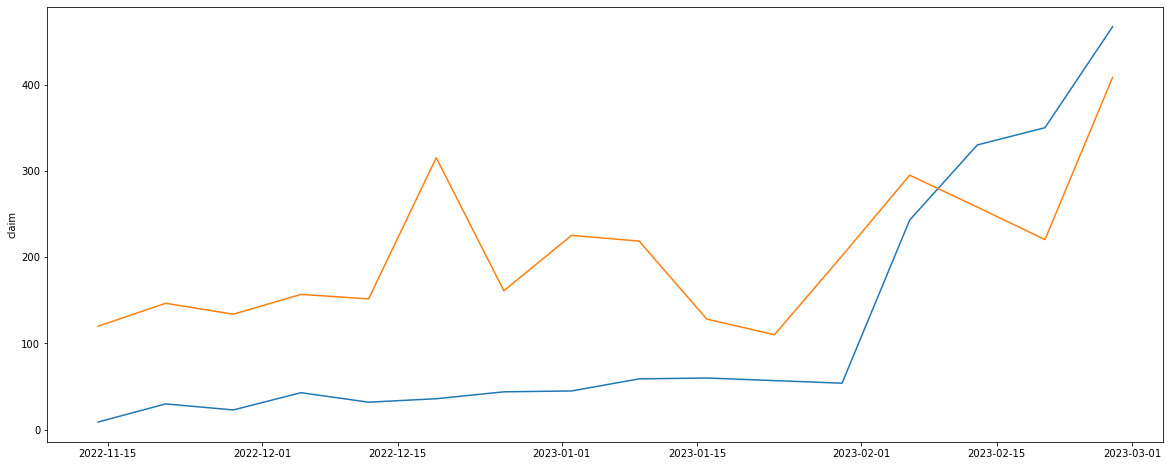

In [52]:
# function to write features for claim prediction
plt.figure(figsize = (20,8))
sns.lineplot(x = "week_of_monday", y = "claim", data = graph_test)
sns.lineplot(x = "week_of_monday", y = "claim prediction", data = graph_test)

plt.xlabel("")

In [53]:
# WMAP score
def calc_wmape(actual, pred):
    abs_diff = abs(actual - pred)
    weight = (abs_diff / actual * 100) * actual
    total_weight = weight.sum()
    total_claims = actual.sum()
    return (total_weight/total_claims)

calc_wmape(graph_test['claim'], graph_test['claim prediction'])

100.38412354279548

In [46]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

MAPE(graph_test['claim'], graph_test['claim prediction'])

314.2354822346859

In [47]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(graph_test['claim'], graph_test['claim prediction'])

314.23548223468595

# Model 2 graphing

In [62]:
graph_test_2 = X_test.copy()
graph_test_2 = graph_test_2[['phone size','iphone 11','black','iphone x','blue','year','weekofyear',
                         'iphone se','day', 'gray','gold','white','iphone 12','month','iphone 14']]
X_test_2 = graph_test_2.copy()
graph_test_2['claim_prediction'] = model2.predict(X_test_2)
#graph_test_2
display(graph_test_2)




,phone size,iphone 11,black,iphone x,blue,year,weekofyear,iphone se,day,gray,gold,white,iphone 12,month,iphone 14,claim_prediction
0,128,0,1,0,0,2023,10,0,6,0,0,0,0,3,1,58.355810
1,128,0,0,0,1,2023,10,0,6,0,0,0,0,3,1,64.083329
2,128,0,0,0,0,2023,10,0,6,0,1,0,0,3,1,29.848445
3,128,0,0,0,0,2023,10,0,6,0,0,0,0,3,1,19.207887
4,128,0,0,0,0,2023,10,0,6,0,0,0,0,3,1,19.207887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,512,0,0,0,1,2023,13,0,27,0,0,0,0,3,1,38.824161
68,512,0,0,0,0,2023,13,0,27,0,1,0,0,3,1,6.885265
69,512,0,0,0,0,2023,13,0,27,0,0,0,0,3,1,3.549036
70,512,0,0,0,0,2023,13,0,27,0,0,0,0,3,1,3.549036


In [63]:
res_group_week = graph_test_2.groupby(['weekofyear']).agg({'claim_prediction': ['sum']})
res_group_size = graph_test_2.groupby(['weekofyear', 'phone size']).agg({'claim_prediction': ['sum']})
print(res_group_week)
print(res_group_size)

           claim_prediction
                        sum
weekofyear                 
10               447.535150
11               499.187768
12               516.682483
13               568.851371
                      claim_prediction
                                   sum
weekofyear phone size                 
10         128              209.714415
           256              158.847140
           512               78.973595
11         128              224.250193
           256              198.981604
           512               75.955971
12         128              235.527289
           256              203.201507
           512               77.953688
13         128              292.211448
           256              203.715603
           512               72.924319


In [66]:
# Graphing
graph_df_2 = df_apple_2.copy()
#graph_df.info()
#graph_df.groupby(['']).mean()

graph_test_2 = graph_df_2.iloc[int(len(graph_df_2)*0.75):]
graph_test_2['claim prediction'] = model2.predict(X_test)

#graph_test = graph_test.loc[(graph_test['phone size'] == 128) & (graph_test['black'] == 1)]
graph_test_2 = graph_test_2.loc[(graph_test_2['iphone 14'] == 1)]

display(graph_test_2)
#graph_test = graph_test.groupby(['weeks_monday', 'phone size']).agg({'claim': ['sum']})
graph_test_2 = pd.DataFrame(graph_test_2.groupby(['week_of_monday'])["claim","claim prediction"].sum())
graph_test_2["week_of_monday"] = graph_test_2.index
graph_test_2 = graph_test_2.reset_index(drop = True)
#graph_test = graph_test.iloc[:-1,:]
display(graph_test_2)
graph_test_2.info()

<ipython-input-66-1e6320b12cbc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_test_2['claim prediction'] = model2.predict(X_test)


,phone size,claim,iphone 11,black,iphone x,blue,year,weekofyear,iphone se,day,gray,gold,white,iphone 12,month,iphone 14,claim prediction
week_of_monday,,,,,,,,,,,,,,,,,
2022-11-14,128,7,0,1,0,0,2022,46,0,14,0,0,0,0,11,1,82.162287
2022-11-14,128,2,0,0,0,0,2022,46,0,14,0,0,1,0,11,1,38.668642
2022-11-21,128,11,0,1,0,0,2022,47,0,21,0,0,0,0,11,1,76.732725
2022-11-21,128,8,0,0,0,0,2022,47,0,21,0,0,1,0,11,1,38.980814
2022-11-21,256,8,0,1,0,0,2022,47,0,21,0,0,0,0,11,1,15.506176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27,128,99,0,0,0,0,2023,9,0,27,0,0,0,0,2,1,27.967797
2023-02-27,256,33,0,1,0,0,2023,9,0,27,0,0,0,0,2,1,17.596938
2023-02-27,256,2,0,0,0,0,2023,9,0,27,0,1,0,0,2,1,23.463594


<ipython-input-66-1e6320b12cbc>:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  graph_test_2 = pd.DataFrame(graph_test_2.groupby(['week_of_monday'])["claim","claim prediction"].sum())


,claim,claim prediction,week_of_monday
0,9,120.830929,2022-11-14
1,30,165.435020,2022-11-21
2,23,131.814790,2022-11-28
3,43,177.861790,2022-12-05
4,32,178.439824,2022-12-12
5,36,303.595883,2022-12-19
6,44,184.844062,2022-12-26
7,45,202.363649,2023-01-02
8,59,199.873915,2023-01-09
9,60,128.431178,2023-01-16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   claim             16 non-null     int64         
 1   claim prediction  16 non-null     float64       
 2   week_of_monday    16 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 512.0 bytes


Text(0.5, 0, '')

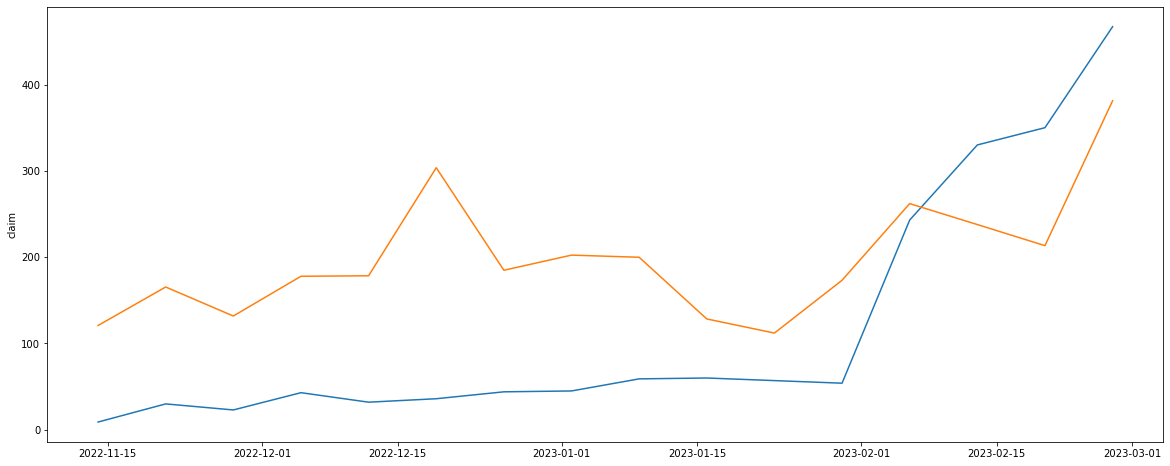

In [68]:
plt.figure(figsize = (20,8))
sns.lineplot(x = "week_of_monday", y = "claim", data = graph_test_2)
sns.lineplot(x = "week_of_monday", y = "claim prediction", data = graph_test_2)

plt.xlabel("")

In [69]:
# WMAP score
def calc_wmape(actual, pred):
    abs_diff = abs(actual - pred)
    weight = (abs_diff / actual * 100) * actual
    total_weight = weight.sum()
    total_claims = actual.sum()
    return (total_weight/total_claims)

calc_wmape(graph_test_2['claim'], graph_test_2['claim prediction'])

102.0486591966355


# Cross-validation with hyperparameter tuning

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [28]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,30, 50, 80, 90, 100, 110],
    'max_features': ['sqrt','log'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

random_search = RandomizedSearchCV(
    model, param_distributions=param_grid, n_iter=10, cv=5, verbose=2
)

In [29]:
random_search.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=110, max_features=log, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=log, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.1s


/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py"

[CV] END bootstrap=True, max_depth=110, max_features=log, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=log, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=log, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.1s


/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py"

[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.3s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.3s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.3s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.3s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   4.2s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   4.2s
[CV] END bootstrap=True, max_depth

/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py"

[CV] END bootstrap=True, max_depth=90, max_features=log, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=log, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=log, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.1s


/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py"

[CV] END bootstrap=True, max_depth=100, max_features=log, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=log, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=log, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.1s


/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py"

[CV] END bootstrap=True, max_depth=100, max_features=log, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=log, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.1s


/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py"

[CV] END bootstrap=True, max_depth=10, max_features=log, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   0.3s


/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py"

[CV] END bootstrap=True, max_depth=10, max_features=log, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   0.3s


/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py"

[CV] END bootstrap=True, max_depth=10, max_features=log, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   0.3s


/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py"

[CV] END bootstrap=True, max_depth=10, max_features=log, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   0.3s


/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py"

[CV] END bootstrap=True, max_depth=10, max_features=log, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.0s


/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.46275276 0.4717942  0.46400169 0.48067298 0.47052816
        nan        nan        nan 0.38803884]
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(min_samples_leaf=4, n_jobs=1,
                                                   oob_score=True,
                                                   random_state=10),
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 30, 50, 80, 90, 100,
                                                      110],
                                        'max_features': ['sqrt', 'log'],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [8, 10, 12],
                                        'n_estimators': [100, 200, 300, 1000]},
                   verbose=2)

In [30]:
print(random_search.best_params_)

{'n_estimators': 300, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}


In [31]:
final_model = RandomForestRegressor(**random_search.best_params_)
final_model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=50, max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=8, n_estimators=300)

In [27]:
pred_2 = final_model.predict(X_test)
r2_score(Y_test, pred_2)
print(f'model score on training data: {final_model.score(X_train, Y_train)}')
print(f'model score on testing data: {final_model.score(X_test, Y_test)}')

model score on training data: 0.6278826020464234
model score on testing data: 0.4963507347590086


In [34]:
graph_test_1 = X_test.copy()
graph_test_1['claim_prediction'] = final_model.predict(X_test)
graph_test_1

,phone size,year,black,blue,coral,gold,graphite,gray,green,midnight,...,iphone 11,iphone 12,iphone 13,iphone 14,iphone se,iphone x,weekofyear,month,day,claim_prediction
0,128,2023,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,10,3,6,58.973430
1,128,2023,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,10,3,6,91.316873
2,128,2023,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,10,3,6,44.844228
3,128,2023,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,10,3,6,30.871971
4,128,2023,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,10,3,6,24.309972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,512,2023,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,13,3,27,60.097545
68,512,2023,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,13,3,27,18.931487
69,512,2023,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,13,3,27,18.388063
70,512,2023,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,13,3,27,12.011586
